In [7]:
#!pip install dtreeviz

In [8]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import dtreeviz
import graphviz
import graphviz.backend as be
from IPython.display import Image, display_svg, SVG
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [9]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.font_manager
fm = matplotlib.font_manager
fm._get_fontconfig_fonts.cache_clear()
plt.rcParams['font.family'] = 'Times New Roman'

## Loading data

In [10]:
df= pd.read_csv('../data/cleaned/withyr_builtencoded.csv')
df

,sqft_above,sqft_lot15,sqft_living15,waterfront,view,condition,grade,bedrooms,sqft_basement_cat,floors,yr_built_cat,zip,price,year_bin
0,1180,5650,1340,0,0,3,7,3,1,1.0,1,1,221900,4
1,2170,7639,1690,0,0,3,7,3,2,2.0,1,1,538000,4
2,770,8062,2720,0,0,3,6,2,1,1.0,1,0,180000,2
3,1050,5000,1360,0,0,5,7,4,3,1.0,1,1,604000,5
4,1680,7503,1800,0,0,3,8,3,1,1.0,1,0,510000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1509,1530,0,0,3,8,3,1,3.0,2,1,360000,9
21593,2310,7200,1830,0,0,3,8,4,1,2.0,3,1,400000,10
21594,1020,2007,1020,0,0,3,7,2,1,2.0,2,1,402101,9
21595,1600,1287,1410,0,0,3,8,3,1,2.0,2,0,400000,9


In [11]:
#select properties above 650k
df = df[df['price'] > 650000]
df.shape

(5205, 14)

In [12]:
#divide x and y
X = df.drop(columns=["price""])
y = df["price"]


In [13]:
X.columns

Index(['sqft_above', 'sqft_lot15', 'sqft_living15', 'waterfront', 'view',
       'condition', 'grade', 'bedrooms', 'sqft_basement_cat', 'floors',
       'yr_built_cat', 'zip', 'year_bin'],
      dtype='object')

we will power transform our X dataset

In [14]:

from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer()
pt.fit(X)

PowerTransformer()

In [15]:
X_transformed= pt.transform(X)
X= pd.DataFrame(X_transformed, columns=X.columns)

In [16]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_above,5205.0,5.515068e-16,1.000096,-3.288107,-0.770637,0.062329,0.743088,3.949487
sqft_lot15,5205.0,-8.343587e-15,1.000096,-4.292241,-0.670695,-0.000500,0.538551,3.056485
sqft_living15,5205.0,-1.159325e-15,1.000096,-3.072324,-0.734280,0.048111,0.720165,3.386583
waterfront,5205.0,-1.638139e-17,1.000096,-0.161933,-0.161933,-0.161933,-0.161933,6.175382
view,5205.0,1.501627e-17,1.000096,-0.575726,-0.575726,-0.575726,-0.575726,1.811154
condition,5205.0,4.903496e-15,1.000096,-13.899405,-0.668491,-0.668491,0.966874,1.865529
grade,5205.0,-3.549301e-16,1.000096,-3.888235,-0.685052,0.163088,0.936020,2.916187
bedrooms,5205.0,4.463928e-16,1.000096,-4.161104,-0.937880,0.253241,0.253241,5.174165
sqft_basement_cat,5205.0,-2.163708e-16,1.000096,-0.956503,-0.956503,-0.956503,0.908767,1.322945
floors,5205.0,6.006509e-17,1.000096,-1.430988,-1.430988,0.559129,0.559129,3.922182


standard normalization to my dataset  to bound them between [0,1] or [1,-1]

In [17]:
from sklearn.preprocessing import minmax_scale
X_scaled= minmax_scale(X)
X= pd.DataFrame(X_scaled, columns=X.columns)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_above,5205.0,0.454309,0.138181,0.0,0.347833,0.462921,0.556980,1.0
sqft_lot15,5205.0,0.584080,0.136091,0.0,0.492813,0.584012,0.657364,1.0
sqft_living15,5205.0,0.475672,0.154840,0.0,0.361988,0.483121,0.587172,1.0
waterfront,5205.0,0.025552,0.157811,0.0,0.000000,0.000000,0.000000,1.0
view,5205.0,0.241204,0.418997,0.0,0.000000,0.000000,0.000000,1.0
condition,5205.0,0.881666,0.063438,0.0,0.839262,0.839262,0.942997,1.0
grade,5205.0,0.571428,0.146977,0.0,0.470750,0.595396,0.708988,1.0
bedrooms,5205.0,0.445740,0.107131,0.0,0.345274,0.472867,0.472867,1.0
sqft_basement_cat,5205.0,0.419620,0.438745,0.0,0.000000,0.000000,0.818299,1.0
floors,5205.0,0.267316,0.186823,0.0,0.000000,0.371764,0.371764,1.0


In [18]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_above,5205.0,0.454309,0.138181,0.0,0.347833,0.462921,0.556980,1.0
sqft_lot15,5205.0,0.584080,0.136091,0.0,0.492813,0.584012,0.657364,1.0
sqft_living15,5205.0,0.475672,0.154840,0.0,0.361988,0.483121,0.587172,1.0
waterfront,5205.0,0.025552,0.157811,0.0,0.000000,0.000000,0.000000,1.0
view,5205.0,0.241204,0.418997,0.0,0.000000,0.000000,0.000000,1.0
condition,5205.0,0.881666,0.063438,0.0,0.839262,0.839262,0.942997,1.0
grade,5205.0,0.571428,0.146977,0.0,0.470750,0.595396,0.708988,1.0
bedrooms,5205.0,0.445740,0.107131,0.0,0.345274,0.472867,0.472867,1.0
sqft_basement_cat,5205.0,0.419620,0.438745,0.0,0.000000,0.000000,0.818299,1.0
floors,5205.0,0.267316,0.186823,0.0,0.000000,0.371764,0.371764,1.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

# We need to cast again into df to visualize the decision tree
X_train_df = pd.DataFrame(X_train, columns=X.columns)
#y_train_df = pd.DataFrame(y_train, columns=["Price"])

X_test_df = pd.DataFrame(X_test, columns=X.columns)
#y_test_df = pd.DataFrame(y_test, columns=["Price"])

In [20]:
X_train_df

,sqft_above,sqft_lot15,sqft_living15,waterfront,view,condition,grade,bedrooms,sqft_basement_cat,floors,yr_built_cat,zip,year_bin
4541,0.398429,0.688961,0.475111,0.0,0.0,0.839262,0.708988,0.345274,1.000000,0.000000,0.86111,0.0,1.000000
3842,0.427966,0.496771,0.590641,0.0,0.0,1.000000,0.708988,0.345274,0.818299,0.371764,0.00000,1.0,0.536464
1457,0.543852,0.516421,0.588908,0.0,0.0,0.839262,0.595396,0.472867,0.000000,0.371764,0.86111,0.0,0.878553
460,0.355455,0.610751,0.454695,0.0,0.0,0.942997,0.470750,0.472867,1.000000,0.000000,0.00000,0.0,0.646484
2418,0.296614,0.616801,0.471073,0.0,0.0,0.942997,0.470750,0.345274,0.818299,0.000000,0.00000,0.0,0.536464
...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.345904,0.610576,0.369030,0.0,0.0,0.839262,0.470750,0.345274,0.531680,0.000000,0.00000,0.0,0.760623
5192,0.690491,0.583260,0.531331,0.0,0.0,0.839262,0.708988,0.583755,0.000000,0.371764,0.86111,0.0,0.878553
3980,0.389839,0.543528,0.467012,0.0,1.0,0.839262,0.595396,0.193075,0.000000,0.371764,0.00000,0.0,0.760623
235,0.237757,0.522787,0.211772,0.0,0.0,0.839262,0.332550,0.345274,0.531680,0.000000,0.00000,1.0,0.330541


let´s use grid search to look for a great parameter

In [24]:
from sklearn.model_selection import GridSearchCV

max_depth_choices = [3,5] # max_depth lists to try
criterion_choices = ['squared_error','absolute_error'] # possible values optimization metrics list
min_samples_split_choices = [2,10] # list of possible values of min_samples_split to try
min_samples_leaf_choices = [2,10] # list of the possible values of min_samples_leaf to try

In [25]:
#create grid, which is a dictionary with hyperparameters
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [26]:
model = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5)

In [27]:
#fit
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5], 'min_samples_leaf': [2, 10],
                         'min_samples_split': [2, 10]})

In [28]:
#best r2
print("The best R2 for the best hyperparameters is {:.2f}".format(grid_search.best_score_))

The best R2 for the best hyperparameters is 0.47


In [29]:
#see the best parameter
grid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

check random search

In [30]:
import numpy as np

In [31]:
from sklearn.model_selection import RandomizedSearchCV

max_depth_choices= np.random.randint(low=1, high=len(X.columns), size=3) # A random integer between 1 and the number of columns
criterion_choices =  ['squared_error','absolute_error'] # A list of the possible values optimization metrics
min_samples_split_choices = np.random.randint(low=2, high=10, size=3) # A random integer between 1 and the number of columns
min_samples_leaf_choices = np.random.randint(low=2, high=10, size=3) # A random integer between 1 and the number of columns
max_features_choices = np.random.randint(low=1, high=len(X.columns), size=3) # A random integer between 1 and the number of columns

random_grid = {'max_depth': max_depth_choices,
               'criterion': criterion_choices,
               'min_samples_split': min_samples_split_choices,
               'min_samples_leaf': min_samples_leaf_choices,
               'max_features': max_features_choices}

In [32]:
model = DecisionTreeRegressor()
# n_iter is how many random combinations of hyperparameters will test use the computer.
random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter=25, cv = 5, n_jobs = 2)

In [33]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=25, n_jobs=2,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([6, 7, 4]),
                                        'max_features': array([ 7, 10,  4]),
                                        'min_samples_leaf': array([5, 8, 8]),
                                        'min_samples_split': array([6, 4, 5])})

In [34]:
random_search.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 8,
 'max_features': 10,
 'max_depth': 6,
 'criterion': 'squared_error'}

In [35]:
print("The best R2 according to the random search is {:.2f}".format(random_search.best_score_))

The best R2 according to the random search is 0.51


In [36]:
#let´s use this model
model = DecisionTreeRegressor (min_samples_split= 10,
                               min_samples_leaf= 8,
                               max_features= 8,
                               max_depth= 9,
                               criterion= 'squared_error')


In [37]:
model.fit(X_train, y_train)
model.score(X_test, y_test).round(2)

0.55

so far it had produced the best R2 score at 0.63 for the test data, a litle above the score from randomized search . and for train set
:

In [38]:
model.score(X_train, y_train).round(2)

0.7

In [39]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [40]:
y_train_pred = [round(value, 2) for value in y_train_pred]
y_test_pred= [round(value, 2) for value in y_test_pred]

# Create a dictionary with the results
results = {
    "Set": ["Train"] * len(X_train) + ["Test"] * len(X_test),
    "Real": list(y_train) + list(y_test),
    "Predicted": y_train_pred + y_test_pred
}

# Create the results DataFrame
results_df = pd.DataFrame(results)
results_df

,Set,Real,Predicted
0,Train,680000,1024663.64
1,Train,1600000,1079922.70
2,Train,731000,784632.36
3,Train,962000,756534.28
4,Train,714000,756534.28
...,...,...,...
5200,Test,1140000,1005375.03
5201,Test,818500,861401.88
5202,Test,725000,805206.98
5203,Test,680000,721515.48


In [41]:
results_df.columns

Index(['Set', 'Real', 'Predicted'], dtype='object')

## feature importance
we will consider the order of importance of our features

In [42]:
#check feature importance
importances = model.feature_importances_
importances


array([0.08294782, 0.03368333, 0.0628503 , 0.14234499, 0.0269607 ,
       0.00310155, 0.49058581, 0.00596806, 0.0437897 , 0.00334257,
       0.00057401, 0.01185421, 0.09199695])

In [43]:
#get the feature importance in a dataframe
feature_importance = pd.DataFrame({"feature": X.columns, "importance": importances})

In [53]:
#feature importance
feature=feature_importance.sort_values(by="importance", ascending=False).reset_index(drop=True)

In [54]:
#export feature importance
feature.to_csv('../data/cleaned/feature_importance.csv', index=False)

In [46]:
results_df['Errors'] = results_df['Real'] - results_df['Predicted']
results_df.head()

,Set,Real,Predicted,Errors
0,Train,680000,1024663.64,-344663.64
1,Train,1600000,1079922.70,520077.30
2,Train,731000,784632.36,-53632.36
3,Train,962000,756534.28,205465.72
4,Train,714000,756534.28,-42534.28


In [47]:
#select only rows where real is greater than 1000000
results_df2 = results_df[results_df['Real'] > 1000000]
results_df2.head()

,Set,Real,Predicted,Errors
1,Train,1600000,1079922.70,520077.30
10,Train,1280000,1391492.86,-111492.86
16,Train,1800000,1410714.29,389285.71
19,Train,1300000,965803.80,334196.20
21,Train,1250000,1612187.50,-362187.50


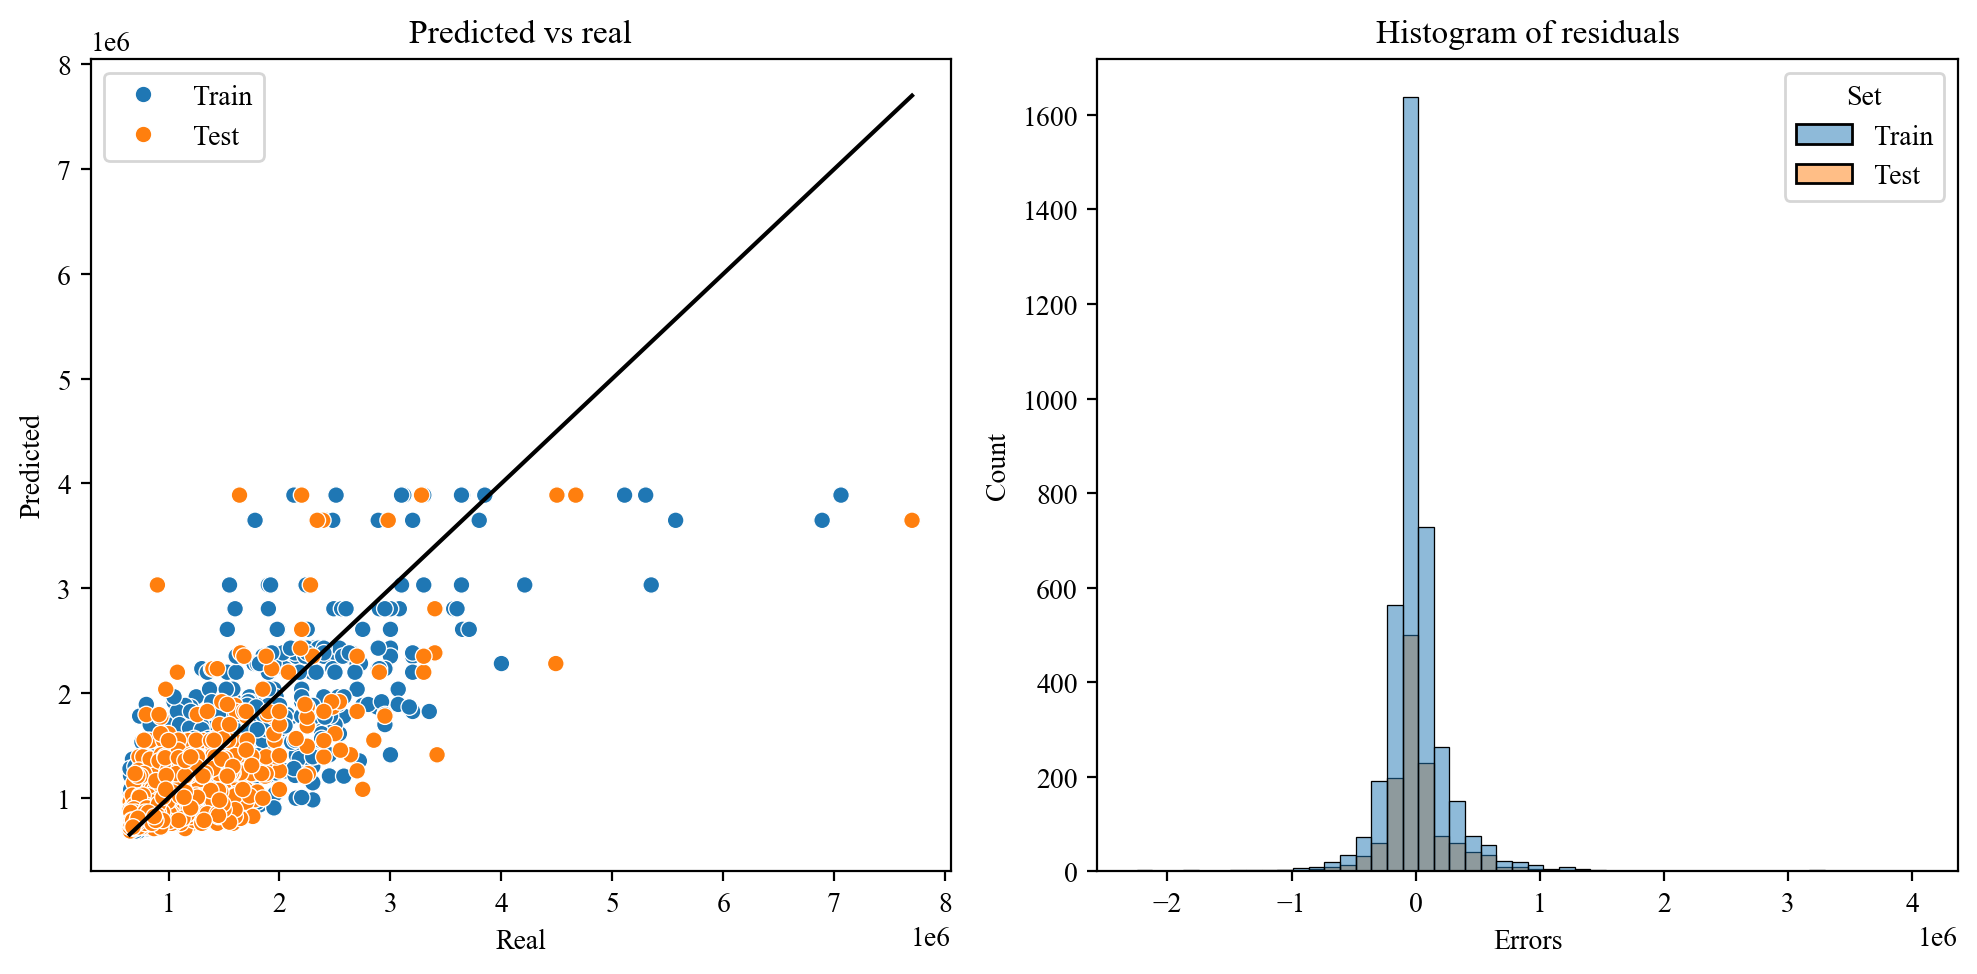

In [48]:
#visualize real and predicted
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(data=results_df, x="Real", y="Predicted", hue="Set", ax=ax[0])
sns.lineplot(data=results_df, x="Real", y="Real", color="black", ax=ax[0])
ax[0].set_title("Predicted vs real")
sns.histplot(results_df, x="Errors", bins=50, hue="Set", ax=ax[1])
ax[1].set_title("Histogram of residuals")

plt.tight_layout()
plt.show()

In [49]:
#test for mae, mse, rmse, r2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
   The error metrics report function calculates for regression.

    Parameters:
    - y_real_train (list): The actual target values for the training dataset.
    - y_real_test (list): The actual target values for the testing dataset.
    - y_pred_train (list): The predicted target values for the training dataset.
    - y_pred_test (list): The predicted target values for the testing dataset.

    Returns:
    - metrics_df (DataFrame): A Pandas DataFrame containing error metrics for both the training and testing datasets.
    - 'Metric' (str): The name of the error metric.
    - 'Training Set' (float): The error metric value for the training set.
    - 'Testing Set' (float): The error metric value for the testing set.
    '''

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric":['MAE', 'MSE', 'RMSE', 'R2'] , 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))


    return results_df

In [51]:
error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))

,Metric,Train,Test
0,MAE,158292.92,187949.81
1,MSE,69174038348.89,103729647411.77
2,RMSE,69174038348.89,103729647411.77
3,R2,0.70,0.55
